In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [96]:
df =pd.read_csv('election2024.csv')


In [98]:
df.head()


,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,07169ed8148ce047,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,NaN,farming,1.445172
1,0716a4f3354cecdd,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,0716889b304ce79c,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,07168e28b5cce563,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,NaN,NaN,1.538628
4,0716a563914ce549,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015


In [100]:
df.shape


(1600, 16)

In [102]:
df.columns


Index(['id', 'sex', 'age', 'federal_district', 'type_of_city',
       'knows_election_date', 'will_vote', 'candidate', 'television_usage',
       'internet_usage', 'education', 'income', 'employment', 'job_type',
       'company_type', 'weight1'],
      dtype='object')

In [104]:
df.describe()


,age,weight1
count,1600.000000,1600.000000
mean,49.936250,1.000000
std,16.901797,0.327084
min,18.000000,0.468226
25%,37.000000,0.772224
50%,49.000000,0.921724
75%,64.000000,1.158913
max,90.000000,2.515072


In [106]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1600 non-null   object 
 1   sex                  1600 non-null   object 
 2   age                  1600 non-null   float64
 3   federal_district     1600 non-null   object 
 4   type_of_city         1600 non-null   object 
 5   knows_election_date  1600 non-null   object 
 6   will_vote            1600 non-null   object 
 7   candidate            1600 non-null   object 
 8   television_usage     1600 non-null   object 
 9   internet_usage       1600 non-null   object 
 10  education            1600 non-null   object 
 11  income               1600 non-null   object 
 12  employment           1600 non-null   object 
 13  job_type             692 non-null    object 
 14  company_type         879 non-null    object 
 15  weight1              1600 non-null   f

In [108]:
df['age'] = pd.to_numeric(df['age'],downcast='integer')


In [110]:
df['income'].value_counts()


income
medium         949
high           405
low            149
very high       48
very low        34
hard to say     15
Name: count, dtype: int64

In [112]:
# Define the mapping
income_mapping = {
    'very low': 1,
    'low': 2,
    'medium': 3,
    'high': 4,
    'very high': 5,
    'hard to say': 0  # Using 0 for 'hard to say', or you can choose another value based on context
}

# Convert to numerical values
df['income'] = df['income'].map(income_mapping)


In [114]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1600 non-null   object 
 1   sex                  1600 non-null   object 
 2   age                  1600 non-null   int8   
 3   federal_district     1600 non-null   object 
 4   type_of_city         1600 non-null   object 
 5   knows_election_date  1600 non-null   object 
 6   will_vote            1600 non-null   object 
 7   candidate            1600 non-null   object 
 8   television_usage     1600 non-null   object 
 9   internet_usage       1600 non-null   object 
 10  education            1600 non-null   object 
 11  income               1600 non-null   int64  
 12  employment           1600 non-null   object 
 13  job_type             692 non-null    object 
 14  company_type         879 non-null    object 
 15  weight1              1600 non-null   f

In [116]:
df['television_usage'].value_counts()


television_usage
less than 4 hours a day    490
over 4 hours a day         436
does not watch             332
several times a week       204
several times a month       76
once half a year            62
Name: count, dtype: int64

In [118]:
df['television_usage'] = pd.Categorical(df['television_usage'])


<Axes: xlabel='sex'>

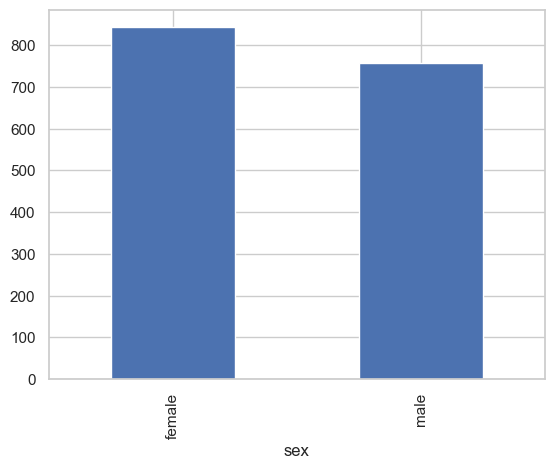

In [120]:
df['sex'].value_counts().plot(kind='bar')


<Axes: ylabel='count'>

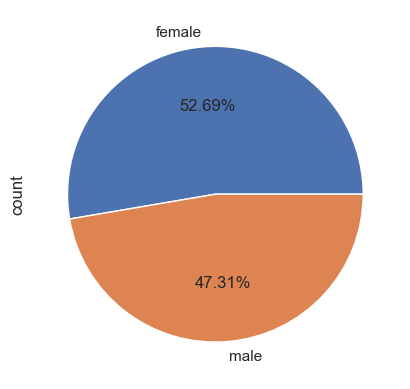

In [122]:
df['sex'].value_counts().plot(kind='pie',autopct = '%.2f%%')


<Axes: xlabel='age', ylabel='Count'>

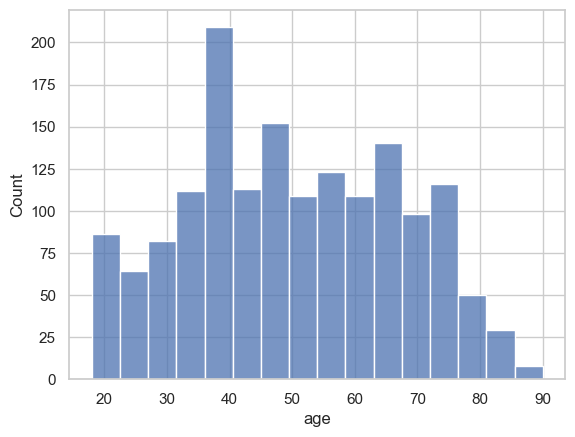

In [124]:
sns.histplot(df['age'])


<Axes: xlabel='sex'>

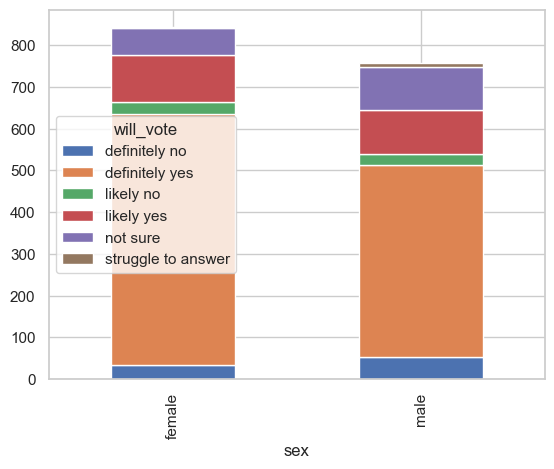

In [126]:
pd.crosstab(df['sex'], df['will_vote']).plot(kind='bar', stacked=True)


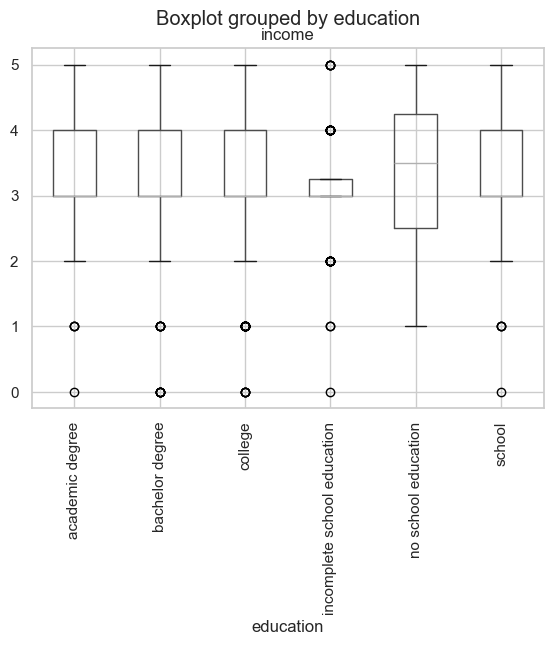

In [128]:
df.boxplot(column='income', by='education')
plt.xticks(rotation = 90)
plt.show()


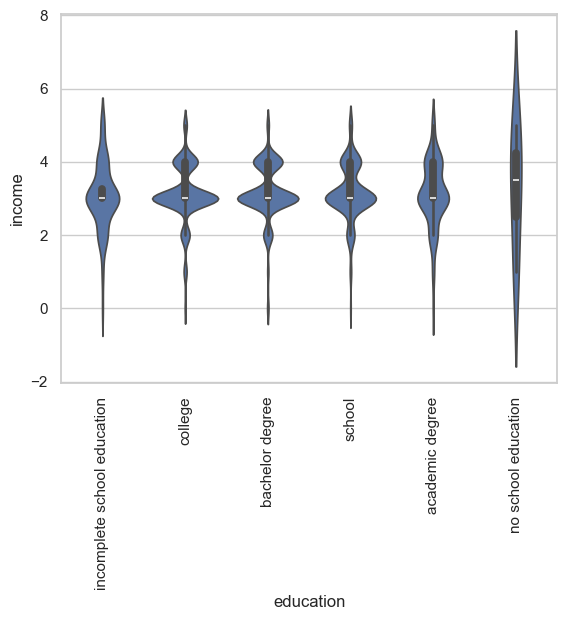

In [130]:
import seaborn as sns
sns.violinplot(x='education', y='income', data=df)
plt.xticks(rotation = 90)
plt.show()


<Axes: xlabel='television_usage', ylabel='internet_usage'>

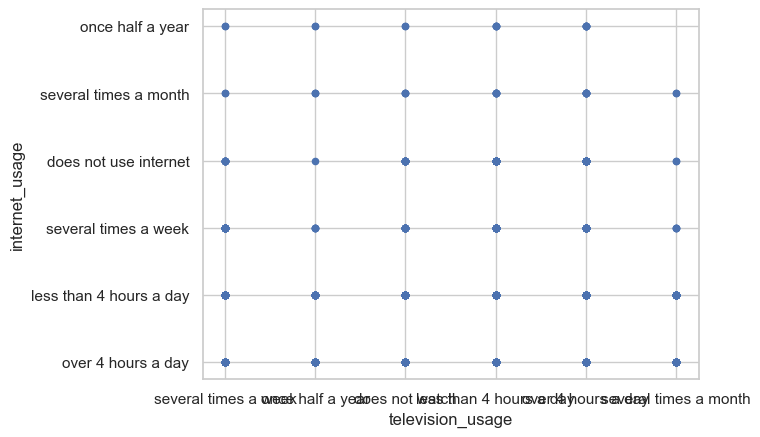

In [132]:
df.plot.scatter(x='television_usage', y='internet_usage')


In [134]:


# Convert to categorical
df['internet_usage'] = pd.Categorical(df['internet_usage'])

print(df['internet_usage'].dtype)  # Output should be 'category'

# Check categories
print(df['internet_usage'].cat.categories)


category
Index(['does not use internet', 'less than 4 hours a day', 'once half a year',
       'over 4 hours a day', 'several times a month', 'several times a week'],
      dtype='object')


In [136]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   id                   1600 non-null   object  
 1   sex                  1600 non-null   object  
 2   age                  1600 non-null   int8    
 3   federal_district     1600 non-null   object  
 4   type_of_city         1600 non-null   object  
 5   knows_election_date  1600 non-null   object  
 6   will_vote            1600 non-null   object  
 7   candidate            1600 non-null   object  
 8   television_usage     1600 non-null   category
 9   internet_usage       1600 non-null   category
 10  education            1600 non-null   object  
 11  income               1600 non-null   int64   
 12  employment           1600 non-null   object  
 13  job_type             692 non-null    object  
 14  company_type         879 non-null    object  
 15  weight1              

In [138]:
df['television_usage']


0       several times a week
1           once half a year
2       several times a week
3       several times a week
4             does not watch
                ...         
1595      over 4 hours a day
1596    several times a week
1597          does not watch
1598      over 4 hours a day
1599      over 4 hours a day
Name: television_usage, Length: 1600, dtype: category
Categories (6, object): ['does not watch', 'less than 4 hours a day', 'once half a year', 'over 4 hours a day', 'several times a month', 'several times a week']

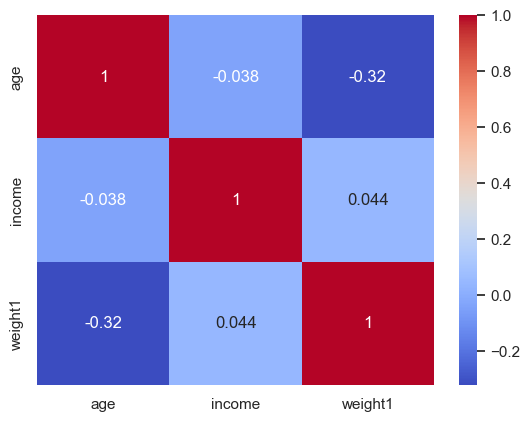

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df[['age',  'income', 'weight1']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


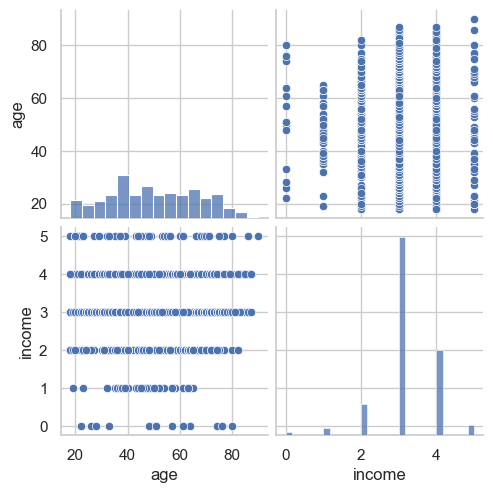

In [142]:
sns.pairplot(df[['age', 'television_usage', 'internet_usage', 'income']])


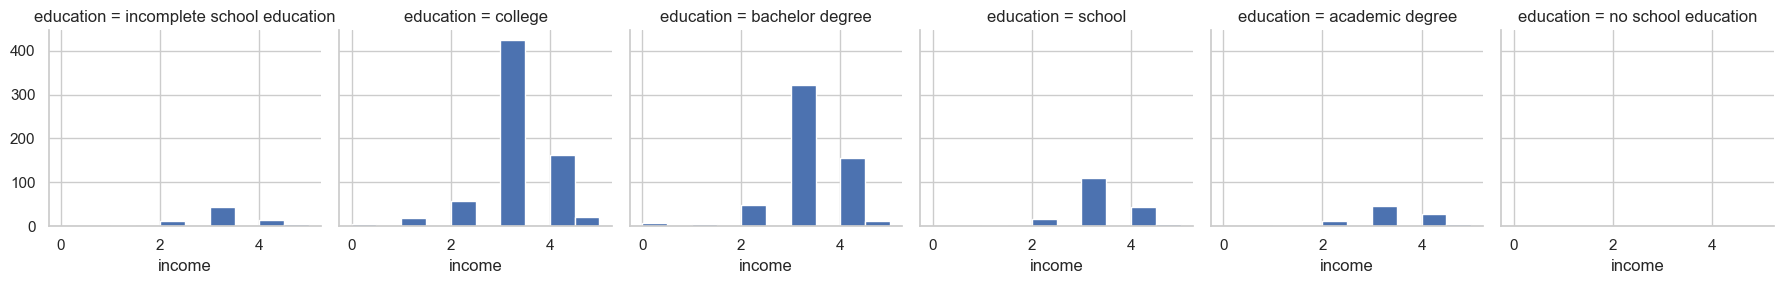

In [144]:
sns.FacetGrid(df, col='education').map(plt.hist, 'income')


<Axes: xlabel='age_group'>

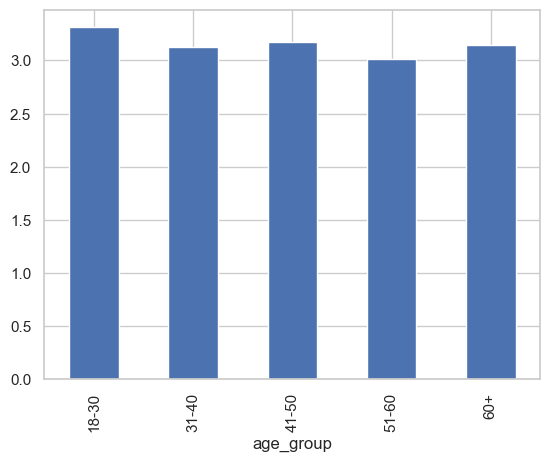

In [146]:
age_groups = pd.cut(df['age'], bins=[18, 30, 40, 50, 60, 100], labels=['18-30', '31-40', '41-50', '51-60', '60+'])
df['age_group'] = age_groups
df.groupby('age_group')['income'].mean().plot(kind='bar')


In [148]:
df.columns


Index(['id', 'sex', 'age', 'federal_district', 'type_of_city',
       'knows_election_date', 'will_vote', 'candidate', 'television_usage',
       'internet_usage', 'education', 'income', 'employment', 'job_type',
       'company_type', 'weight1', 'age_group'],
      dtype='object')

In [150]:
# Voter profiles by sex
print(df['sex'].value_counts())

# Voter profiles by age group
print(df['age_group'].value_counts())


sex
female    843
male      757
Name: count, dtype: int64
age_group
60+      491
31-40    342
41-50    297
51-60    259
18-30    191
Name: count, dtype: int64


In [152]:
# Voting behavior by federal district
print(df.groupby('federal_district')['will_vote'].count())

# Voting behavior by type of city
print(df.groupby('type_of_city')['will_vote'].count())


federal_district
central            425
far eastern         89
north caucasian    107
northwestern       151
siberian           188
southern           182
ural               134
volga              324
Name: will_vote, dtype: int64
type_of_city
city with population of 1 million and higher    307
city with population of 100-500k                391
city with population of 50-100k                 106
city with population of 500-950k                170
city with population of less than 50k           179
settlement                                       81
village                                         366
Name: will_vote, dtype: int64


In [154]:
# Correlation between knowing the election date and voting
print(df[['knows_election_date', 'will_vote']].groupby('knows_election_date').count())


                       will_vote
knows_election_date             
named correct date          1361
named correct year            55
not sure or no answer        165
wrong answer                  19


# Candidate preferances

In [157]:
df.head()


,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1,age_group
0,07169ed8148ce047,male,18,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,5,entrepreneur,NaN,farming,1.445172,NaN
1,0716a4f3354cecdd,male,23,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,5,work for hire,commercial organization,trade,1.445172,18-30
2,0716889b304ce79c,male,20,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,5,work for hire,law enforcement agency,law enforcement agency,1.301691,18-30
3,07168e28b5cce563,male,22,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,5,unemployed,NaN,NaN,1.538628,18-30
4,0716a563914ce549,male,21,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,5,employed student,commercial organization,"tech, programming, communications",1.967015,18-30


In [159]:
# Candidate preferences by age group
print(df.groupby('age_group')['candidate'].value_counts(normalize=True))


age_group  candidate         
18-30      Putin                 0.560209
           struggle to answer    0.136126
           Davankov              0.109948
           will not take part    0.089005
           Slutskiy              0.047120
           Kharitonov            0.036649
           spoilt vote           0.020942
31-40      Putin                 0.619883
           struggle to answer    0.128655
           will not take part    0.084795
           Davankov              0.058480
           Slutskiy              0.049708
           Kharitonov            0.040936
           spoilt vote           0.017544
41-50      Putin                 0.744108
           struggle to answer    0.094276
           will not take part    0.067340
           Kharitonov            0.030303
           Slutskiy              0.030303
           Davankov              0.023569
           spoilt vote           0.010101
51-60      Putin                 0.683398
           struggle to answer    0.119691
    

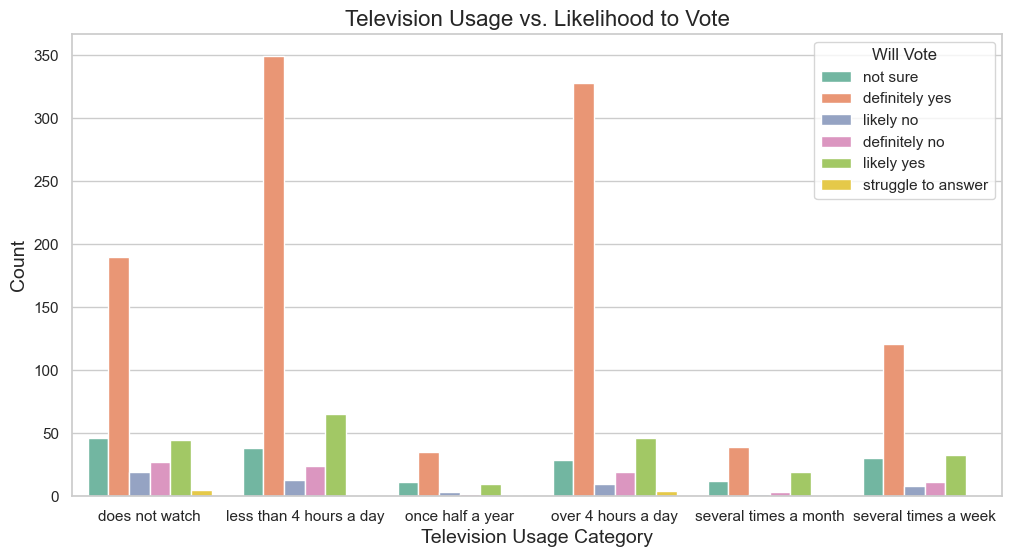

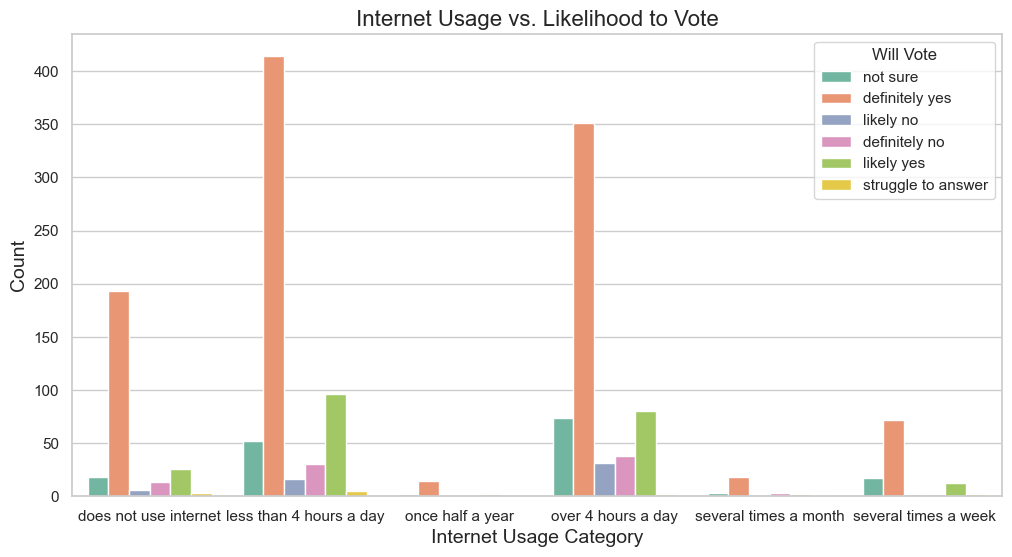

In [161]:

# Set the style of seaborn plots
sns.set(style="whitegrid")

# Plot count plot for Television Usage vs. Likelihood to Vote
plt.figure(figsize=(12, 6))
sns.countplot(x='television_usage', hue='will_vote', data=df, palette='Set2')
plt.title('Television Usage vs. Likelihood to Vote', fontsize=16)
plt.xlabel('Television Usage Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Will Vote', loc='upper right')
plt.show()

# Plot count plot for Internet Usage vs. Likelihood to Vote
plt.figure(figsize=(12, 6))
sns.countplot(x='internet_usage', hue='will_vote', data=df, palette='Set2')
plt.title('Internet Usage vs. Likelihood to Vote', fontsize=16)
plt.xlabel('Internet Usage Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Will Vote', loc='upper right')
plt.show()


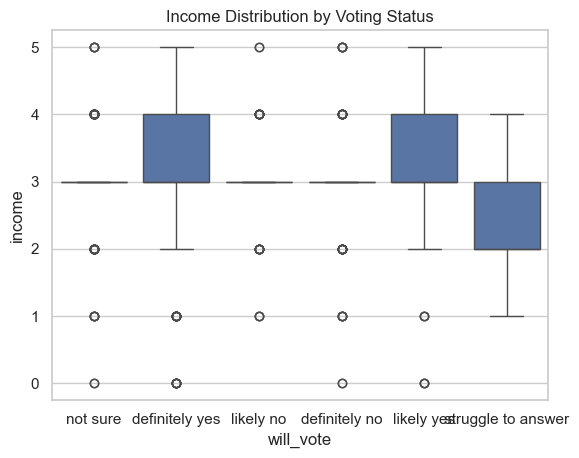

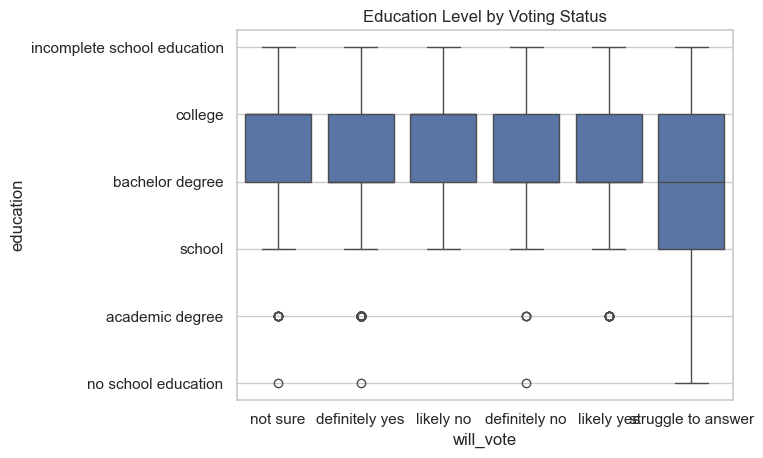

In [165]:
# Income and education level influence on voting
sns.boxplot(x='will_vote', y='income', data=df)
plt.title('Income Distribution by Voting Status')
plt.show()

sns.boxplot(x='will_vote', y='education', data=df)
plt.title('Education Level by Voting Status')
plt.show()


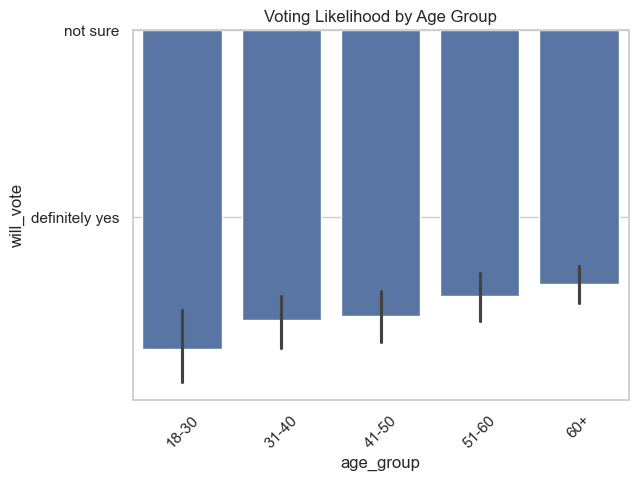

In [167]:
# Voting likelihood by age group
sns.barplot(x='age_group', y='will_vote', data=df)
plt.title('Voting Likelihood by Age Group')
plt.xticks(rotation=45)
plt.show()


In [169]:
pd.crosstab(index = df['will_vote'],columns= df['education'],values = 'sex',aggfunc='count',normalize=True)


education,academic degree,bachelor degree,college,incomplete school education,no school education,school
will_vote,,,,,,
definitely no,0.001875,0.014375,0.022500,0.003750,0.000625,0.010625
definitely yes,0.046250,0.251250,0.275625,0.025000,0.000625,0.065000
likely no,0.000000,0.007500,0.020625,0.001250,0.000000,0.005000
likely yes,0.006875,0.051875,0.056875,0.005000,0.000000,0.015625
not sure,0.004375,0.017500,0.052500,0.014375,0.000625,0.014375
struggle to answer,0.000000,0.001250,0.003125,0.000625,0.000625,0.002500


In [171]:
df.head()


,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1,age_group
0,07169ed8148ce047,male,18,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,5,entrepreneur,NaN,farming,1.445172,NaN
1,0716a4f3354cecdd,male,23,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,5,work for hire,commercial organization,trade,1.445172,18-30
2,0716889b304ce79c,male,20,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,5,work for hire,law enforcement agency,law enforcement agency,1.301691,18-30
3,07168e28b5cce563,male,22,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,5,unemployed,NaN,NaN,1.538628,18-30
4,0716a563914ce549,male,21,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,5,employed student,commercial organization,"tech, programming, communications",1.967015,18-30


In [173]:
pd.crosstab(index = df['employment'],columns = df['candidate'],values = df['will_vote'],aggfunc='count',normalize=True)


candidate,Davankov,Kharitonov,Putin,Slutskiy,spoilt vote,struggle to answer,will not take part
employment,,,,,,,
employed pensioner,0.001250,0.002500,0.056875,0.002500,0.002500,0.006250,0.003125
employed student,0.001875,0.000625,0.015000,0.001875,0.000000,0.001875,0.001875
entrepreneur,0.003750,0.001875,0.035625,0.000625,0.001250,0.006875,0.004375
hard to say,0.000625,0.000625,0.010625,0.000625,0.000000,0.000625,0.000625
parental leave,0.001250,0.000000,0.020000,0.001250,0.000625,0.001875,0.002500
refused to answer,0.000000,0.000000,0.001250,0.000000,0.000000,0.000000,0.000625
self-employed,0.004375,0.001875,0.048125,0.006250,0.001875,0.008125,0.005625
unemployed,0.003750,0.001250,0.043750,0.000625,0.001250,0.006250,0.006250
unemployed pensioner,0.004375,0.016250,0.249375,0.005625,0.003750,0.023750,0.010625


In [175]:
# Percentage by row
crosstab_row_percentage = pd.crosstab(df['television_usage'], df['will_vote'], normalize='index') * 100
print(crosstab_row_percentage)



will_vote                definitely no  definitely yes  likely no  likely yes  \
television_usage                                                                
does not watch                8.132530       57.228916   5.722892   13.554217   
less than 4 hours a day       4.897959       71.224490   2.653061   13.265306   
once half a year              3.225806       56.451613   4.838710   16.129032   
over 4 hours a day            4.357798       75.229358   2.293578   10.550459   
several times a month         3.947368       51.315789   2.631579   25.000000   
several times a week          5.392157       59.313725   3.921569   16.176471   

will_vote                 not sure  struggle to answer  
television_usage                                        
does not watch           13.855422            1.506024  
less than 4 hours a day   7.755102            0.204082  
once half a year         17.741935            1.612903  
over 4 hours a day        6.651376            0.917431  
several t